<a href="https://colab.research.google.com/github/Santyk98/santhanam/blob/main/Main%20Project/code/Election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**"Social Network Based Sentiment and Network Analysis to Predict Elections"**


OBJECTIVE AND SCOPE OF THE PROJECT:
⦁	The objective of this project is to show how sentimental analysis can help improve the user experience over a social network or system interface.  
⦁	The learning algorithm will learn what our emotions are from statistical data then perform sentiment analysis.  
⦁	Our main objective is also maintain accuracy in the final result.  
⦁	The main goal of such a sentiment analysis is to discover how the audience perceives the television show. The Twitter data that is collected will be classified into two categories; positive or negative. An analysis will then be performed on the classified data to investigate what percentage of the audience sample falls into each category.
⦁	Particular emphasis is placed on evaluating different machine learning algorithms for the task of twitter sentiment analysis.

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import random

In [43]:
data = pd.read_csv('election.csv')

In [44]:
data.head()

,id,clean_text,polarity,place
0,1.11772E+18,RT chitraSD Jogging RahulGandhi ’ memory famil...,0,Madras
1,1118061974292533249,AAP INC want alliance stop division Anti-Modi ...,0,NaN
2,1117870131969810432,RT pankaj_shankar She priyankagandhi slams Mod...,0,NaN
3,1.1177E+18,RT airnewsalerts SC says RahulGandhi 's remark...,0,New Delhi
4,1117850484327366656,RT sachinsingh1010 75 year old Govindraj kille...,0,New Delhi Varanasi


In [45]:
data.shape

(10365, 4)

In [46]:
#Check the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365 entries, 0 to 10364
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10365 non-null  object
 1   clean_text  10365 non-null  object
 2   polarity    10365 non-null  int64 
 3   place       7311 non-null   object
dtypes: int64(1), object(3)
memory usage: 324.0+ KB


In [47]:
#Check the missing values in the data
data.isnull().sum()

id               0
clean_text       0
polarity         0
place         3054
dtype: int64

In [48]:
data['polarity'].value_counts()

0    5787
1    4578
Name: polarity, dtype: int64

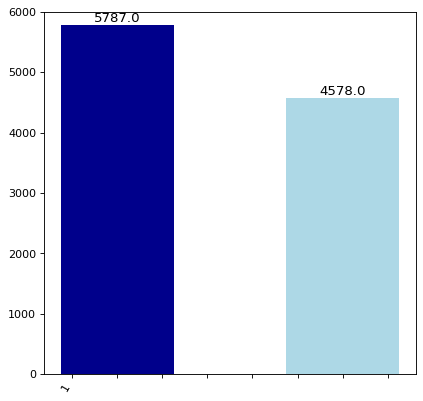

In [49]:
# Prepare Data
df = data.groupby('polarity').size().reset_index(name='counts')
n = df['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(6,6), dpi= 80)
plt.bar(df['polarity'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['polarity'], rotation=60, horizontalalignment= 'right')

plt.ylim(0, 6000)
plt.show()

In [50]:
data['polarity'].value_counts()

0    5787
1    4578
Name: polarity, dtype: int64

In [51]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['polarity']== 0]
df_minority = data[data['polarity']== 1]
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=5000,random_state=123) 
df_majority_downsampled = resample(df_majority, replace=False,n_samples=5000,random_state=123) 
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
df_upsampled['polarity'].value_counts()

1    5000
0    5000
Name: polarity, dtype: int64

In [52]:
# shuffle the DataFrame rows 
data= df_upsampled.sample(frac = 1)

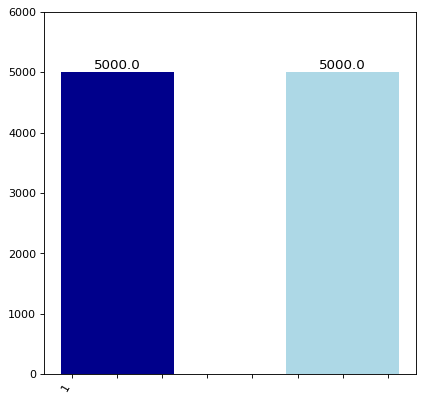

In [53]:
# Prepare Data
df = data.groupby('polarity').size().reset_index(name='counts')
n = df['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(6,6), dpi= 80)
plt.bar(df['polarity'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['polarity'], rotation=60, horizontalalignment= 'right')

plt.ylim(0, 6000)
plt.show()

In [54]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [55]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [56]:
data['clean_text'].head(5)

5235    RT JhaSanjay Dear ArvindKejriwal Ji Let ’ clea...
1642    RT chitraSD Jogging RahulGandhi ’ memory famil...
7922    RT THEBAMNETWORK FOLLOW TaraRRichter ... TOP I...
1210    RT yuvadesh Disgusting disgusting disgusting T...
2132    RT iamnikhilnanda Reckless defamation malignin...
Name: clean_text, dtype: object

In [57]:
print("printing some random reviews")
print(9, data['clean_text'].values[9])
print(34, data['clean_text'].values[34])
print(147, data['clean_text'].values[147])

printing some random reviews
9 RT farooq_pm Killing innocent civilian LoC reprehensible In fact 's act targeted killing something trigger-hap…
34 RT AapkaCharul Is kind comment women acceptable MamataOfficial priyankagandhi priyankac19 dimpleyadav Sheh…
147 RT sachinsingh1010 75 year old Govindraj killed praising Modi incident took place near Orthanadu village Tanjore TamilNadu G…


In [58]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [59]:
preprocessed_text = preprocess_text(data['clean_text'].values)

100%|██████████| 10000/10000 [00:00<00:00, 13875.29it/s]


In [60]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[147])

printing some random reviews
9 rt farooq pm killing innocent civilian loc reprehensible fact act targeted killing something trigger hap
34 rt aapkacharul kind comment women acceptable mamataofficial priyankagandhi priyankac19 dimpleyadav sheh
147 rt sachinsingh1010 75 year old govindraj killed praising modi incident took place near orthanadu village tanjore tamilnadu g


In [61]:
y=np.array(data['polarity'])

In [62]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

#Featuraization : Bag of Words

In [63]:
import pickle

In [64]:
from sklearn import preprocessing

count_vect = CountVectorizer()
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open("count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open("count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)
print("Test Data Size: ",X_test_count.shape)

Train Data Size:  (7000, 6494)
Test Data Size:  (3000, 6494)


#Random Forest with BOW

In [65]:
from sklearn.metrics import accuracy_score , f1_score

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train_count,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 60
optimal max_depth 1000


In [67]:
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

Accuracy on Test data is 0.987
Accuracy on Train data is 1.0
---------------------------


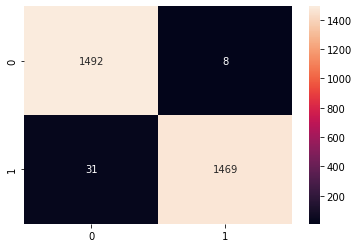

In [68]:
#training our model for max_depth=100,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train_count,y_train)

import pickle
filename = 'election_RF_bow.pkl'
pickle.dump(clf, open(filename, 'wb'))

pred_test =clf.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = clf.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train)
#test_f1_score = f1_score((y_test, pred_test))


print("Accuracy on Test data is " +str(test_accuracy))
print("Accuracy on Train data is "+str(train_accuracy))

print("---------------------------")


# Code for drawing seaborn heatmaps

df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()) )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [69]:
results=pd.DataFrame(columns=['Featuraization', 'Model' , 'Train-AUC', 'Test-AUC' ])
new = ['BOW','Random Forest',1.0,0.9923]
results.loc[0] = new

#Liner SVM with BOW

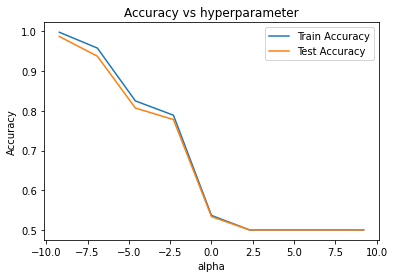

optimal alpha for which auc is maximum :  0.0001


In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
test_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    model.fit(X_train_count,y_train)
    prob_cv = model.predict(X_test_count)
    test_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = model.predict(X_train_count)
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[test_auc.index(max(test_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='Train Accuracy')
x.plot(alpha, test_auc, label='Test Accuracy')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

AUC on Test data is 0.9853333333333333
AUC on Train data is 0.9981428571428571
---------------------------


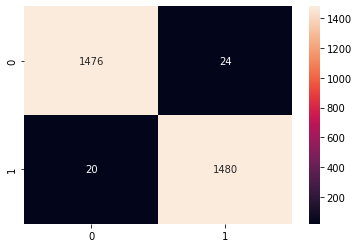

In [71]:
#Testing AUC on Test data
svm = SGDClassifier(alpha=optimal_alpha)

svm.fit(X_train_count,y_train)

filename =  'election_svm_bow.pkl'
pickle.dump(svm, open(filename, 'wb'))

pred_test = svm.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = svm.predict(X_train_count)
train_accuracy = accuracy_score(y_train,pred_train) 




print("AUC on Test data is " +str(test_accuracy))
print("AUC on Train data is " +str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix

df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()) )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [72]:
original =  [1 if x==1 else 0 for x in y_test[:20]]
predicted = svm.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = 1
    pred.append(k)
  else:
    k = 0
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)), 
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,rahulgandhi pappupinkyinkerala 65 cr youngeste...,1,1
1,follow drjimmystar top influencer celebrity pr...,1,1
2,rt sachinsingh1010 75 year old govindraj kille...,0,0
3,vote voice voices struggled abhoganyay right v...,1,1
4,editorspicks sc notice rahulgandhi missing mig...,1,1
5,rt incgujarat watch live cp rahulgandhi congre...,1,1
6,rt firstpost icymi rahulgandhi repeated flippa...,1,1
7,rt mohitbharatiya no one wants see army corrup...,0,0
8,rt ratansharda55 escape amethi planned advance...,1,1
9,rt theleaflet rafale rahulgandhi narendramodi ...,0,0


In [73]:
new = ['BOW','SVM',0.9883,0.9988]
results.loc[2] = new

#Performance Table

In [74]:
results

,Featuraization,Model,Train-AUC,Test-AUC
0,BOW,Random Forest,1.0000,0.9923
2,BOW,SVM,0.9883,0.9988
